In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.__version__ #pandas version

'0.17.1'

In [3]:
from sshtunnel import SSHTunnelForwarder
import MySQLdb as db
import pandas as pd
import sys
import logging
#logging.basicConfig(stream=sys.stdout, level=logging.DEBUG) 
import paramiko
#ssh = paramiko.SSHClient()
#ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
#ssh.connect('ssicluster2.tk.informatik.tu-darmstadt.de',port = 12822, username='arun',password='ArunDss@123',allow_agent=False,look_for_keys=False)
localhost = '127.0.0.1'
user = 'root'
password='kUrsVbpyfFWF'
database = 'Energy_AD'
def query(q):
     with SSHTunnelForwarder(
          ('ssicluster2.tk.informatik.tu-darmstadt.de', 12822),
          allow_agent=False,
          ssh_username='arun',
          ssh_password = 'ArunDss@123',
          #remote_bind_address=('130.83.163.8', 3306)
          remote_bind_address=('127.0.0.1', 3306)
           
     ) as server:
          conn = db.connect(host=localhost,
          port=server.local_bind_port,
          user=user,
          passwd=password,
          db=database)

          return pd.read_sql_query(q, conn)

In [4]:
#!/home/arun/anaconda2/bin/python
import MySQLdb as db1
import pandas as pd
import datetime
import pandas.io.sql as psql

now = datetime.datetime.now()
print "Start date and time using str method of datetime object:"
print str(now)

chunk_size = 500000
offset = 250000
location = 'Siedlerstr_Abgang' + '%'
list_data = []
while True:
    q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s OFFSET %s" % (location,chunk_size,offset))
    print(q)
    list_data.append(query(q))
    offset += chunk_size
    if len(list_data[-1]) < chunk_size:
        break
print("Query executed")

print("Concatenating....")
dfs = pd.concat(list_data)

now1 = datetime.datetime.now()
print "End date and time using str method of datetime object:"
print str(now1)

print("Execution Completed")







Start date and time using str method of datetime object:
2016-12-20 11:17:04.556894
SELECT * FROM energy_sample_data1 where location like 'Siedlerstr_Abgang%' ORDER BY Serial_no LIMIT 500000 OFFSET 250000
SELECT * FROM energy_sample_data1 where location like 'Siedlerstr_Abgang%' ORDER BY Serial_no LIMIT 500000 OFFSET 750000
SELECT * FROM energy_sample_data1 where location like 'Siedlerstr_Abgang%' ORDER BY Serial_no LIMIT 500000 OFFSET 1250000
SELECT * FROM energy_sample_data1 where location like 'Siedlerstr_Abgang%' ORDER BY Serial_no LIMIT 500000 OFFSET 1750000
SELECT * FROM energy_sample_data1 where location like 'Siedlerstr_Abgang%' ORDER BY Serial_no LIMIT 500000 OFFSET 2250000
Query executed
Concatenating....
End date and time using str method of datetime object:
2016-12-20 11:27:24.606223
Execution Completed


In [5]:
dfs = pd.DataFrame(dfs)

In [6]:
dfs.shape #DataFrame containing all fields of Siedlerstr_Trafo

(2099705, 16)

In [7]:
cols = 'DESC energy_sample_data1 '
columns_list = query(cols)

In [8]:
cols_sql = pd.DataFrame(columns_list)
print("Columns names:")
print(cols_sql.iloc[:,0])

Columns names:
0     Serial_no
1          Date
2          Time
3            V1
4            V2
5            V3
6            I1
7            I2
8            I3
9           I_N
10         Pges
11         Sges
12       CosPhi
13     Egy_trpt
14      Egy_con
15     Location
Name: Field, dtype: object


In [9]:
df_cols = cols_sql.iloc[:,0]
columns_names= df_cols.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['Serial_no', 'Date', 'Time', 'V1', 'V2', 'V3', 'I1', 'I2', 'I3', 'I_N', 'Pges', 'Sges', 'CosPhi', 'Egy_trpt', 'Egy_con', 'Location']


In [10]:
dfs.corr()

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Serial_no,1.000000,-0.002263,-0.002297,-0.001984,-0.281558,-0.327563,-0.282465,-0.312573,-0.055100,-0.319799,-0.132364,-0.239722,-0.245174
V1,-0.002263,1.000000,0.999961,0.999897,0.158479,0.186538,0.196100,0.283314,0.036596,0.196817,-0.822645,0.174628,0.181061
V2,-0.002297,0.999961,1.000000,0.999918,0.158214,0.185865,0.196196,0.282850,0.035731,0.196512,-0.822654,0.174335,0.180766
V3,-0.001984,0.999897,0.999918,1.000000,0.157514,0.185715,0.195698,0.282279,0.036585,0.196029,-0.822671,0.175840,0.182297
I1,-0.281558,0.158479,0.158214,0.157514,1.000000,0.813404,0.795629,0.569951,-0.093297,0.933706,-0.038698,0.520989,0.508880
I2,-0.327563,0.186538,0.185865,0.185715,0.813404,1.000000,0.788620,0.674574,0.419498,0.933348,-0.032637,0.513927,0.513946
I3,-0.282465,0.196100,0.196196,0.195698,0.795629,0.788620,1.000000,0.700454,-0.097261,0.923875,-0.067529,0.555170,0.551583
I_N,-0.312573,0.283314,0.282850,0.282279,0.569951,0.674574,0.700454,1.000000,0.133049,0.697031,-0.139854,0.389689,0.405820
Pges,-0.055100,0.036596,0.035731,0.036585,-0.093297,0.419498,-0.097261,0.133049,1.000000,0.086550,0.019611,0.019221,0.034065
Sges,-0.319799,0.196817,0.196512,0.196029,0.933706,0.933348,0.923875,0.697031,0.086550,1.000000,-0.052085,0.570528,0.564973


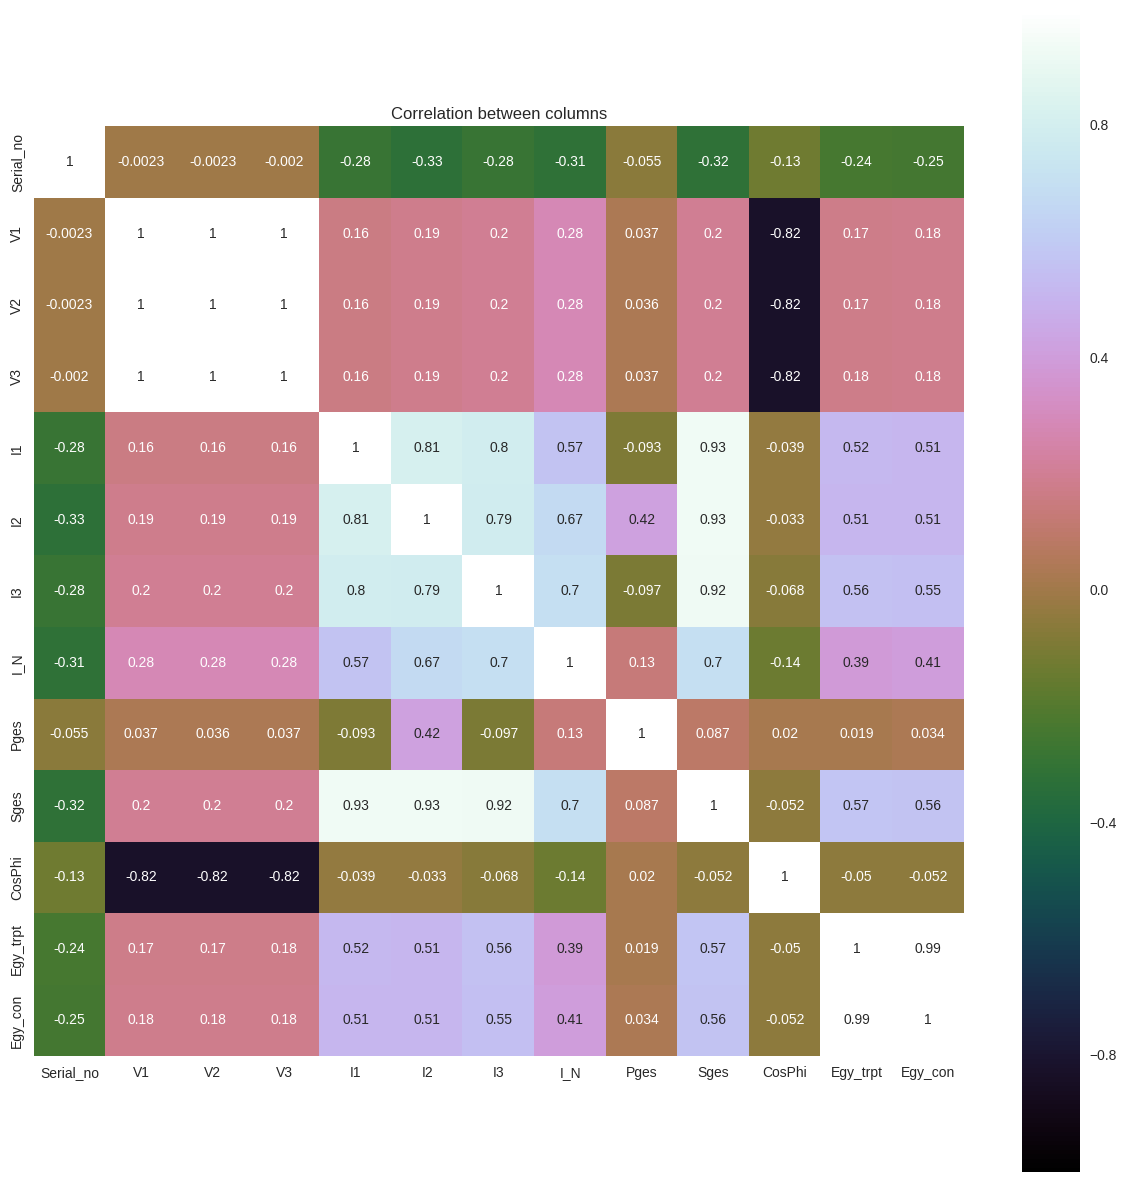

In [11]:
correlation = dfs.corr()
#plt.figure(figsize=(13,13))
fig = plt.figure(figsize=(15,15)) 
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between columns')

fig.savefig('Correlation between  before dimensionality reduction of Siedlerstr_Trafo.png')

# Statistics calculation implementation

In [12]:
dfs.axes

[Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             99695, 99696, 99697, 99698, 99699, 99700, 99701, 99702, 99703,
             99704],
            dtype='int64', length=2099705),
 Index([u'Serial_no', u'Date', u'Time', u'V1', u'V2', u'V3', u'I1', u'I2',
        u'I3', u'I_N', u'Pges', u'Sges', u'CosPhi', u'Egy_trpt', u'Egy_con',
        u'Location'],
       dtype='object')]

In [13]:
dfs.columns

Index([u'Serial_no', u'Date', u'Time', u'V1', u'V2', u'V3', u'I1', u'I2',
       u'I3', u'I_N', u'Pges', u'Sges', u'CosPhi', u'Egy_trpt', u'Egy_con',
       u'Location'],
      dtype='object')

In [14]:
dfs_drop = dfs.drop(labels =['Date','Time','Serial_no'],axis=1)

In [15]:
dfs_drop.head()

,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
0,230.73,231.06,231.53,74.16,86.95,88.95,18.02,-3655.20,57783.93,0.75,765252.08,593085.04,Siedlerstr_Abgang1_10032016.csv
1,230.73,231.06,231.53,74.16,86.95,88.95,18.02,-3655.20,57783.93,0.75,765252.08,593085.04,Siedlerstr_Abgang1_10032016.csv
2,230.67,230.99,231.30,79.56,86.79,88.72,20.29,-4162.89,58949.46,0.74,765281.04,593112.04,Siedlerstr_Abgang1_10032016.csv
3,230.67,230.99,231.30,79.56,86.79,88.72,20.29,-4162.89,58949.46,0.74,765281.04,593112.04,Siedlerstr_Abgang1_10032016.csv
4,230.67,230.99,231.30,79.56,86.79,88.72,20.29,-4162.89,58949.46,0.74,765281.04,593112.04,Siedlerstr_Abgang1_10032016.csv


# Plot statistics by grouping location 

In [16]:
df_loc = dfs_drop.groupby('Location') # groupby location wise

In [17]:
df_loc.describe()

CosPhi        Egy_con  \
Location                                                             
Siedlerstr_Abgang1_10032016.csv count    353.000000     353.000000   
                                mean       0.744391  593884.093824   
                                std        0.012024     416.339016   
                                min        0.710000  593085.040000   
                                25%        0.740000  593531.040000   
                                50%        0.750000  593930.040000   
                                75%        0.750000  594247.040000   
                                max        0.760000  594538.040000   
Siedlerstr_Abgang1_19022016.csv count  10726.000000   10726.000000   
                                mean       3.624131       4.913668   
                                std        2.987029       2.310492   
                                min        0.000000       0.000000   
                                25%        0.010000       6.000000   
                                50%        4.800000       6.000000   
                                75%        7.140000       6.000000   
                                max        7.590000       6.000000   
Siedlerstr_Abgang2_07032016.csv count  47548.000000   47548.000000   
                                mean       0.588703    7841.089131   
                                std        0.100545    4856.895833   
                                min        0.340000       6.000000   
                                25%        0.520000    3980.000000   
                                50%        0.610000    7441.000000   
                                75%        0.660000   12636.000000   
                                max        2.320000   15394.000000   
Siedlerstr_Abgang2_08032016.csv count  86400.000000   86400.000000   
                                mean       0.575302   25161.608600   
                                std        0.090217    6662.038113   
                                min        0.210000   15394.000000   
                                25%        0.510000   18684.000000   
                                50%        0.590000   25316.000000   
...                                             ...            ...   
Siedlerstr_Abgang9_08032016.csv std        0.024916      13.497378   
                                min        0.000000      32.000000   
                                25%        0.030000      39.000000   
                                50%        0.040000      47.000000   
                                75%        0.060000      63.000000   
                                max        0.150000      74.000000   
Siedlerstr_Abgang9_09032016.csv count  86400.000000   86400.000000   
                                mean       0.049266      92.399525   
                                std        0.025351      13.019413   
                                min        0.000000      74.000000   
                                25%        0.030000      81.000000   
                                50%        0.050000      90.000000   
                                75%        0.070000     104.000000   
                                max        0.160000     117.000000   
Siedlerstr_Abgang9_10032016.csv count  30004.000000   30004.000000   
                                mean       0.029869     121.221104   
                                std        0.015965       2.636957   
                                min        0.000000     117.000000   
                                25%        0.020000     119.000000   
                                50%        0.030000     121.000000   
                                75%        0.040000     122.000000   
                                max        0.120000     126.000000   
Siedlerstr_Abgang9_19022016.csv count  10726.000000   10726.000000   
                                mean       3.291095       4.480701   
                                std        2.709941    

Below you will calculate the correlation on the data grouped by location

In [18]:
df_loc_siedlr_trafo_stats = df_loc.corr(method='pearson', min_periods=1)

In [19]:
df_loc_siedlr_trafo_stats.to_csv(r'Siedlr_abgang_part2_stats.csv',mode='w',header='True')

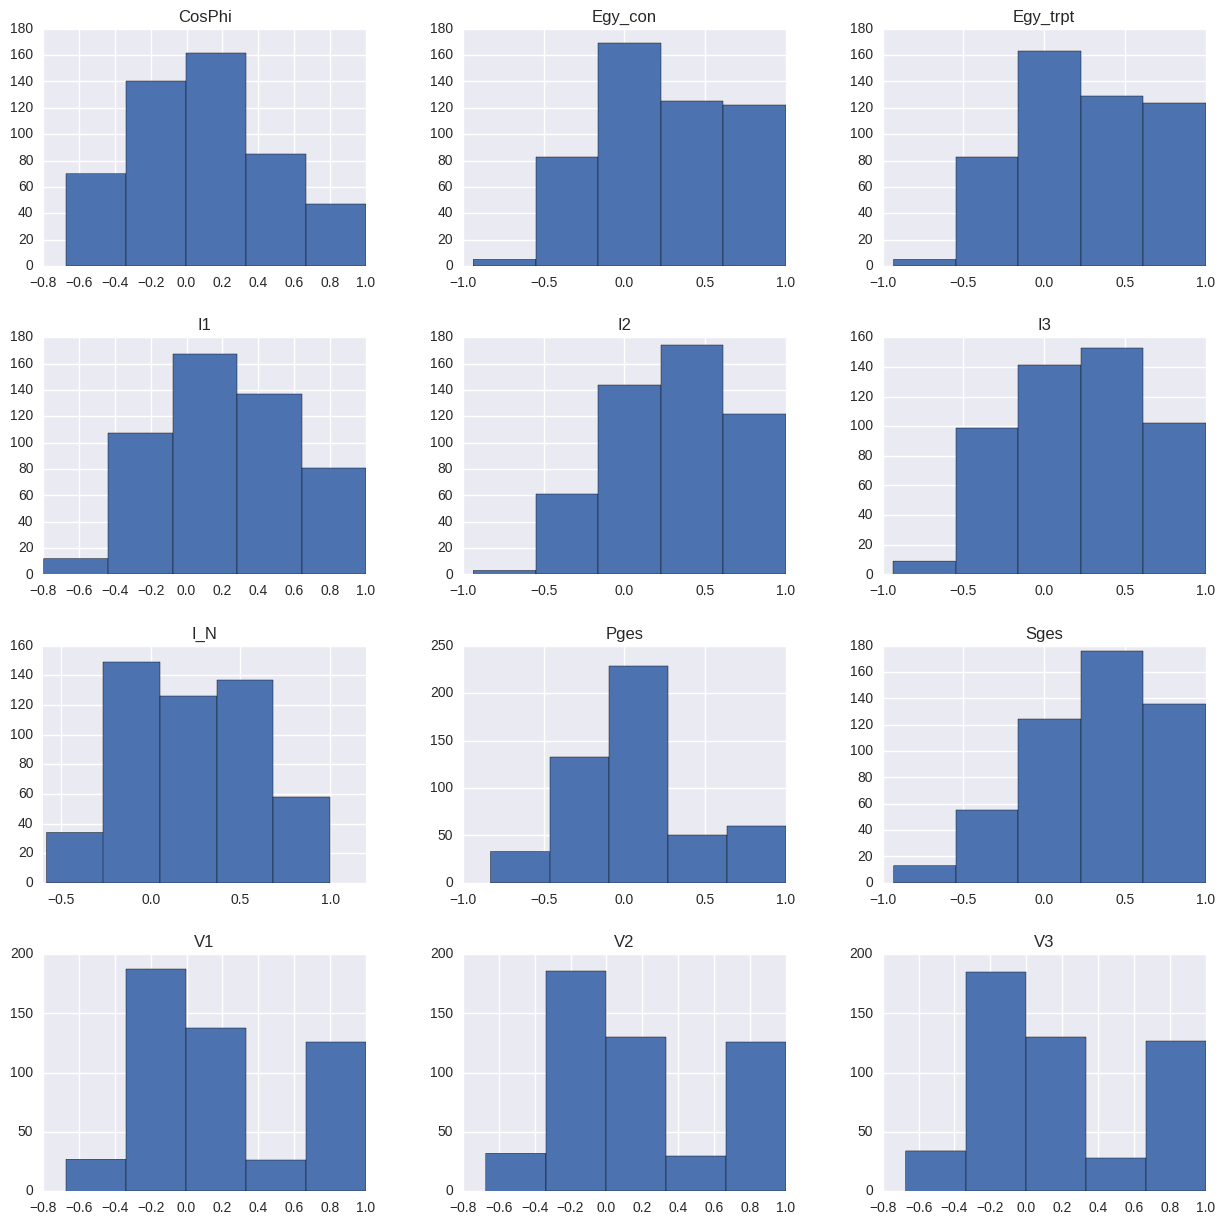

In [21]:
df_loc_siedlr_trafo_stats.hist(bins=5,figsize=(15,15))
plt.savefig('Correlation statistics of Siedlerstr_Abgang_part2.png')
plt.show()


Compute only the mean of the data grouped by location and visualize

In [22]:
df_st_mean = df_loc.mean()
df_st_mean

,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Location,,,,,,,,,,,,
Siedlerstr_Abgang1_10032016.csv,230.466062,230.680425,230.946997,67.128130,65.626827,67.022748,11.432946,-4720.806034,46105.662663,0.744391,766269.832068,593884.093824
Siedlerstr_Abgang1_19022016.csv,55.107791,55.104839,55.095638,0.156282,0.151171,0.156759,0.153301,-1.943577,23.271756,3.624131,4.066567,4.913668
Siedlerstr_Abgang2_07032016.csv,231.430403,231.458093,231.265470,2.793521,5.331627,6.390166,7.016437,40.075566,3359.189705,0.588703,7935.367397,7841.089131
Siedlerstr_Abgang2_08032016.csv,232.107994,232.149259,232.123137,1.429121,4.188127,3.814558,4.919353,323.329084,2186.842294,0.575302,21455.692593,25161.608600
Siedlerstr_Abgang2_09032016.csv,232.257472,232.220323,232.356270,1.877397,3.633337,4.279060,4.891695,78.035095,2271.582167,0.578719,36061.027262,44911.422865
Siedlerstr_Abgang2_10032016.csv,231.430847,231.521396,231.683233,1.370592,2.517381,3.714741,3.392262,34.246153,1761.513493,0.565855,47058.346844,57723.795902
Siedlerstr_Abgang2_19022016.csv,55.147438,55.151143,55.150499,0.154648,0.158307,0.154850,0.155286,-1.263223,21.100527,3.253869,1.613054,4.843077
Siedlerstr_Abgang3_07032016.csv,231.639377,231.656095,231.486746,31.515284,34.831745,29.145887,10.674394,988.017902,22103.590847,0.655922,47605.949837,54356.934034
Siedlerstr_Abgang3_08032016.csv,232.319402,232.344607,232.341713,27.330634,27.272176,26.938142,9.112950,-72.443397,18933.911796,0.647066,157664.236249,170341.026126


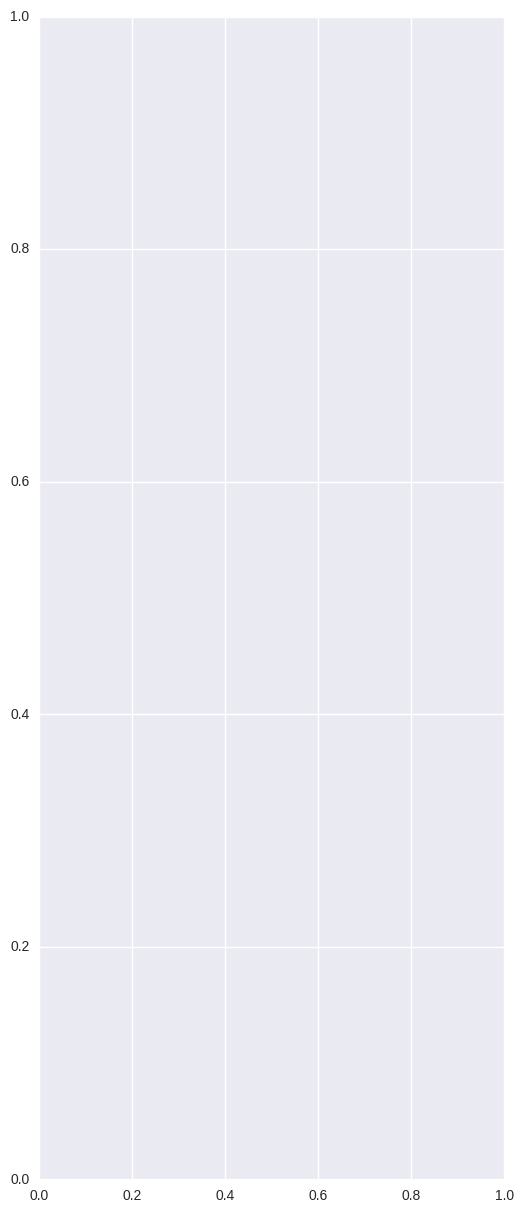

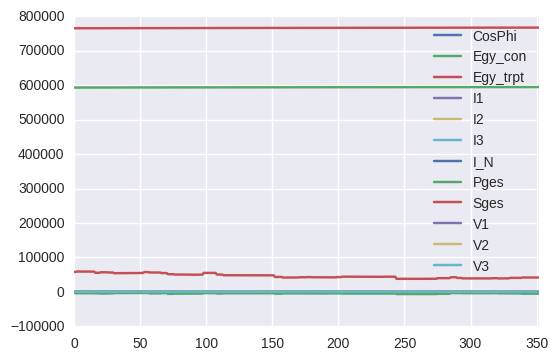

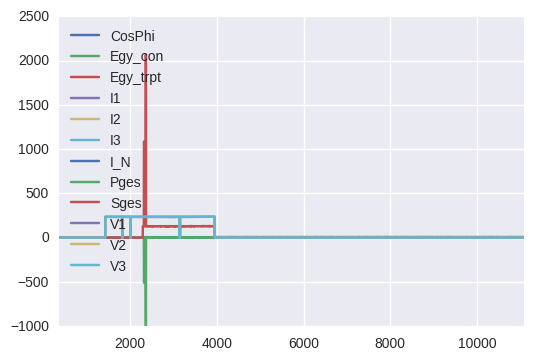

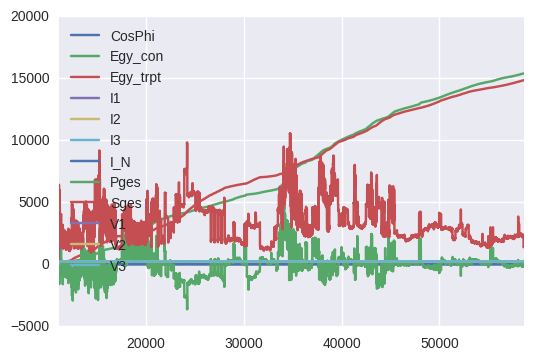

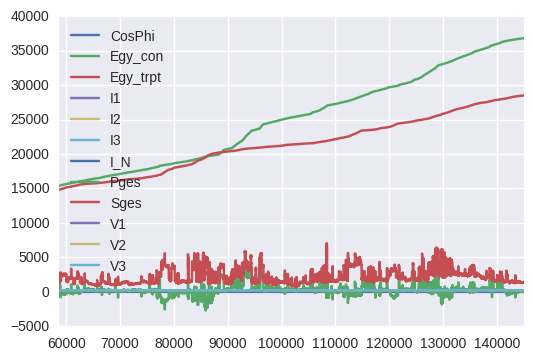

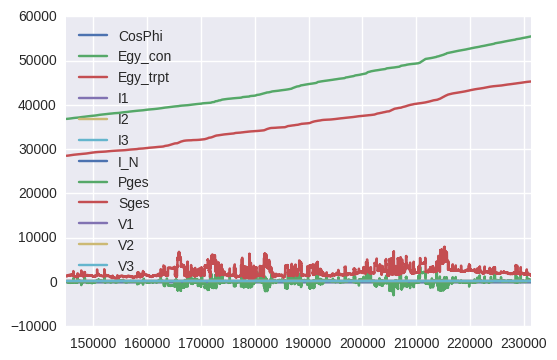

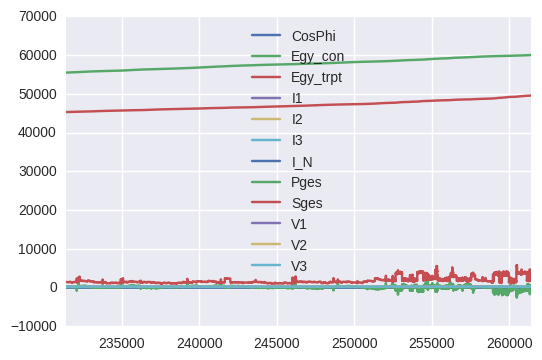

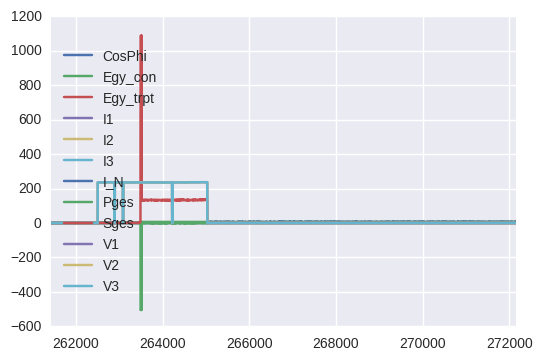

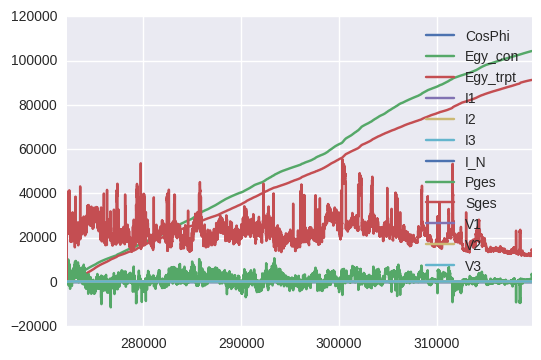

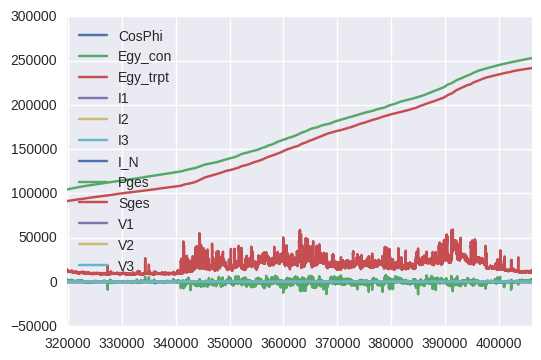

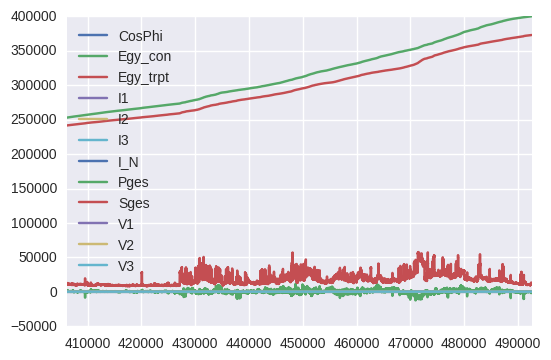

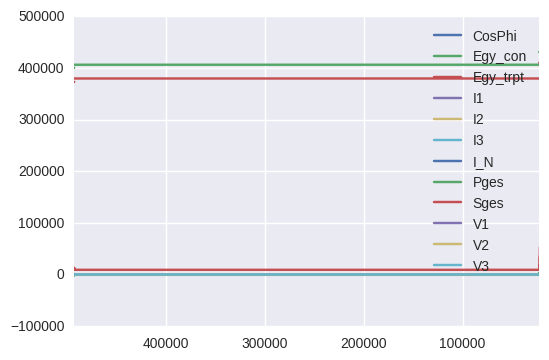

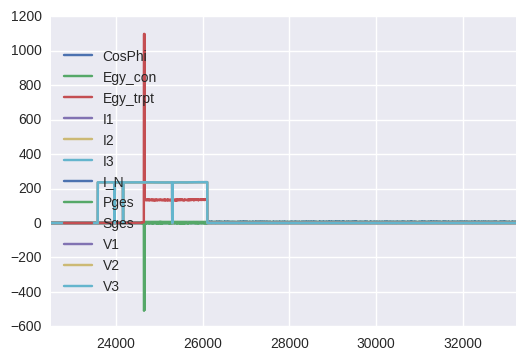

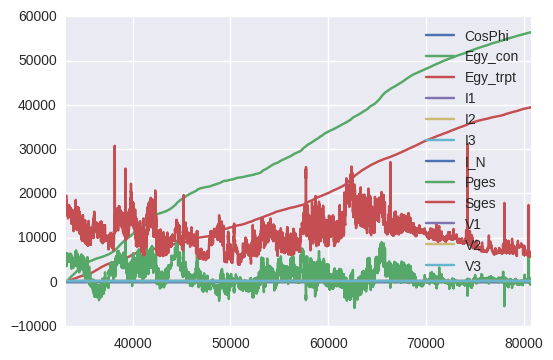

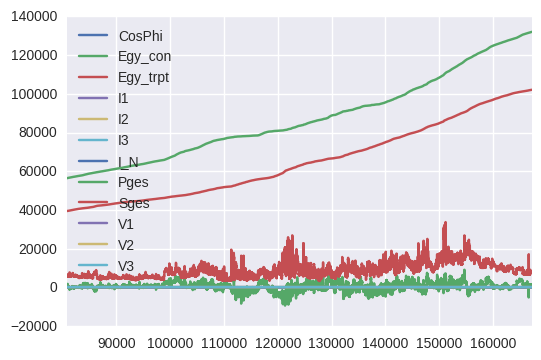

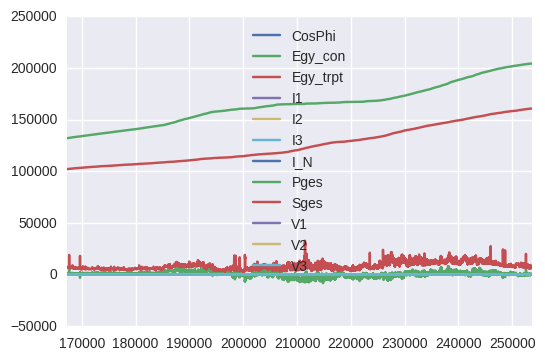

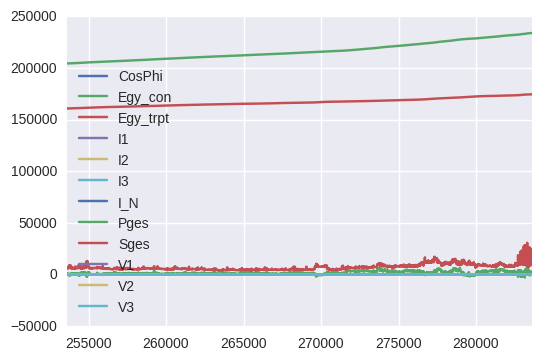

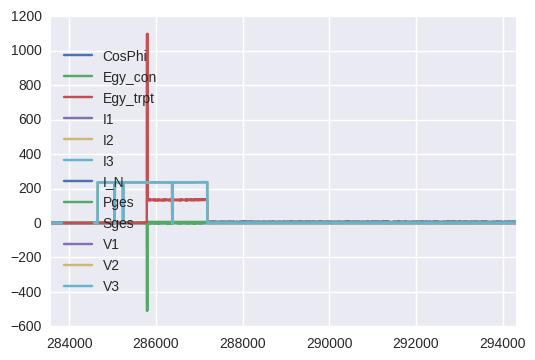

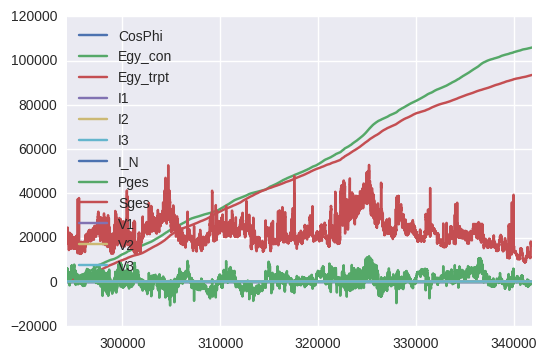

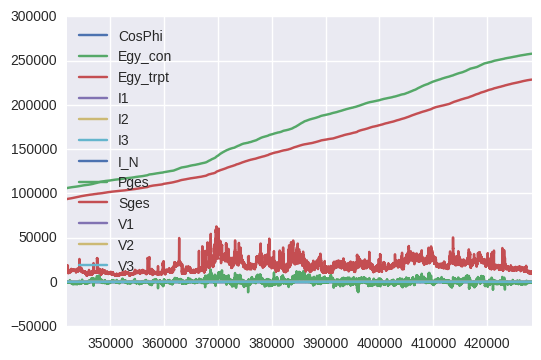

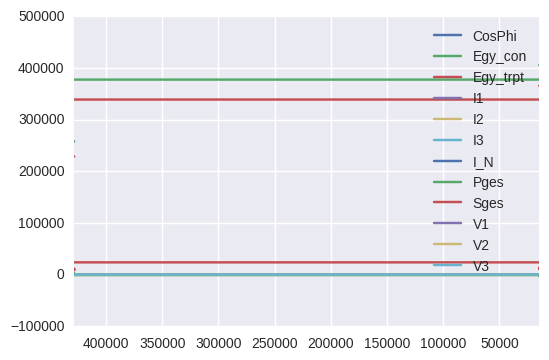

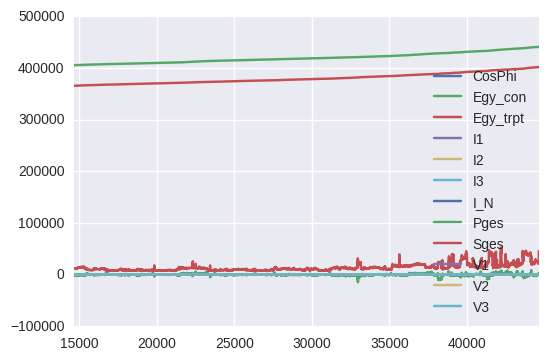

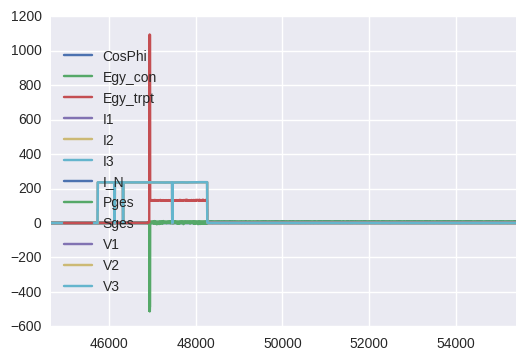

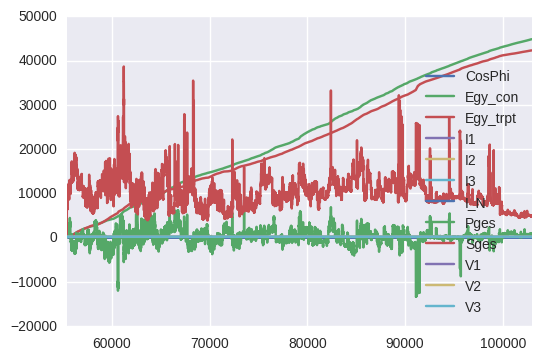

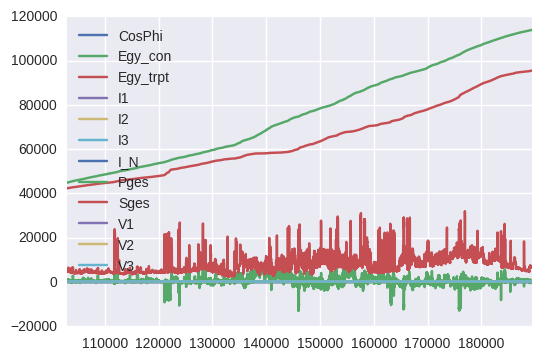

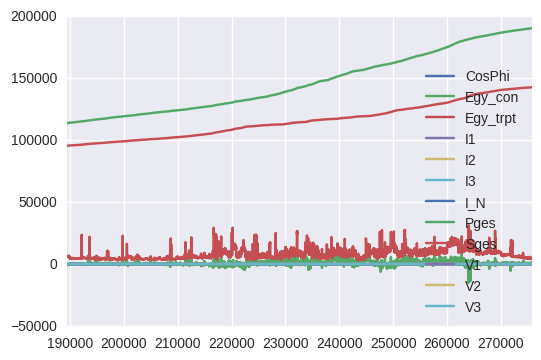

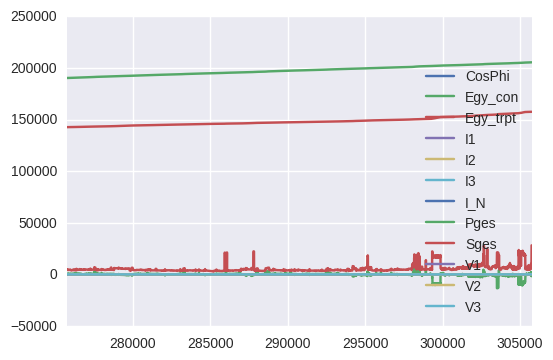

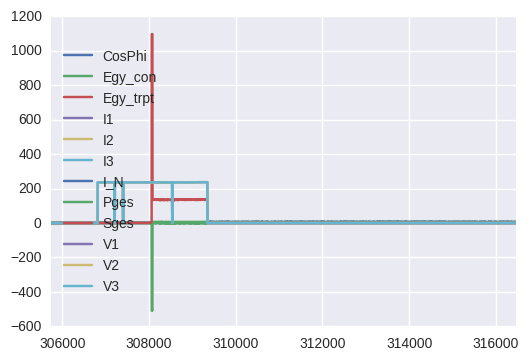

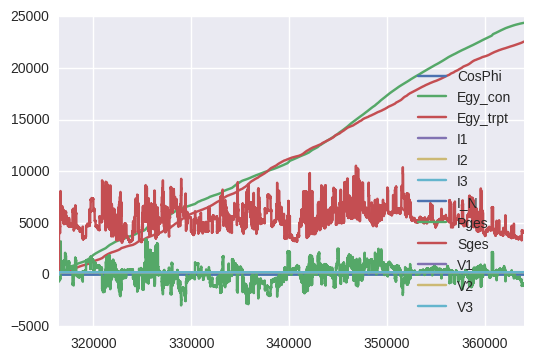

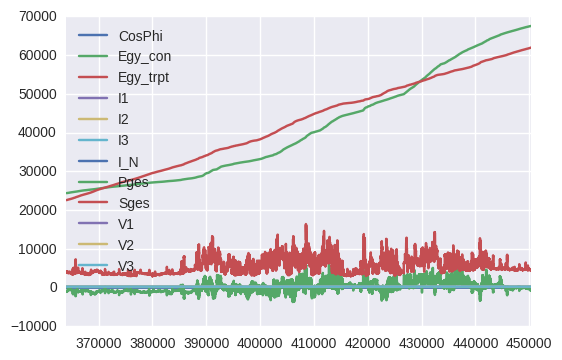

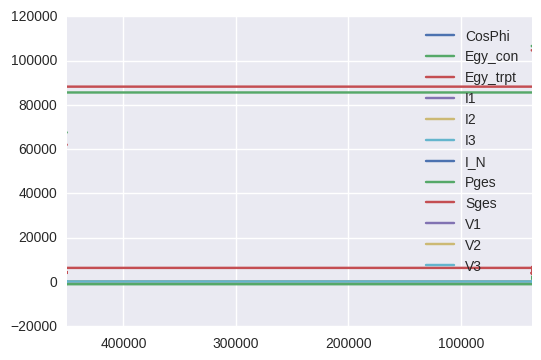

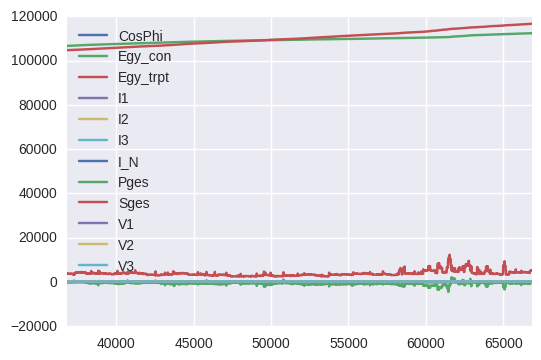

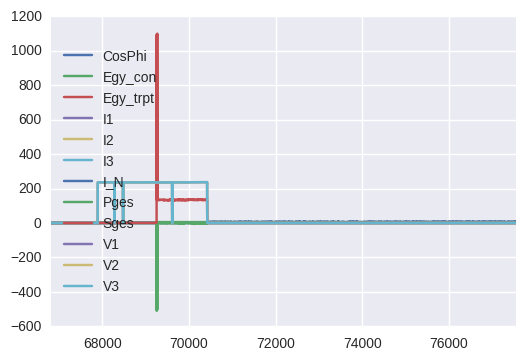

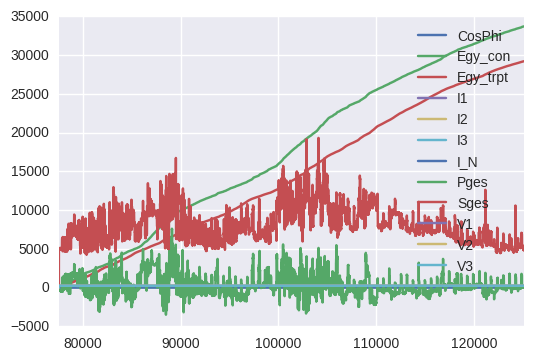

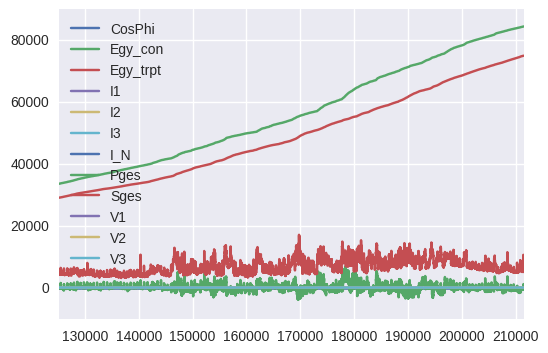

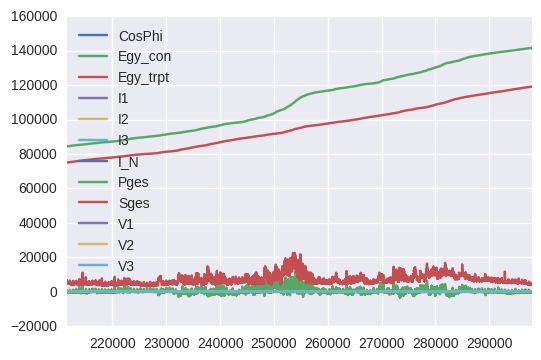

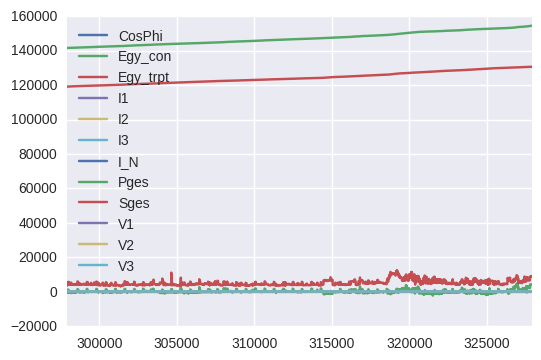

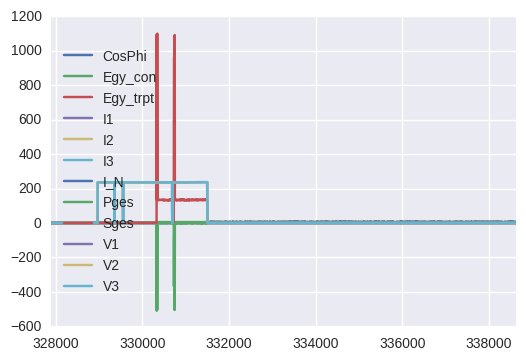

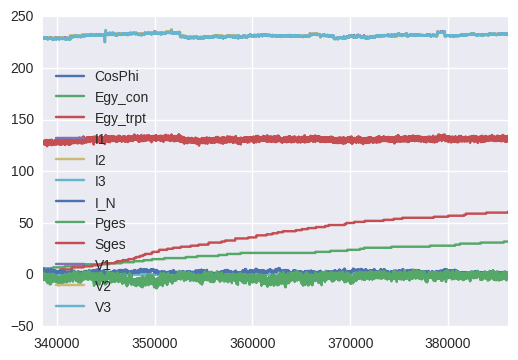

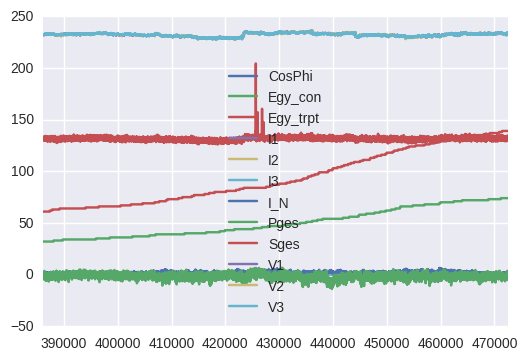

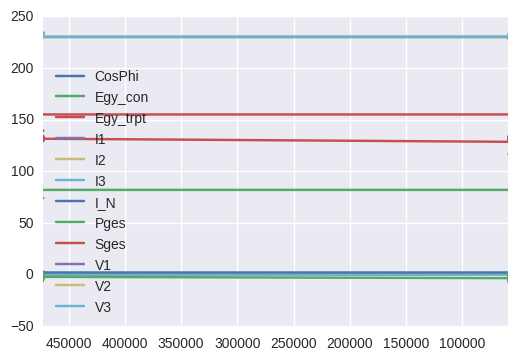

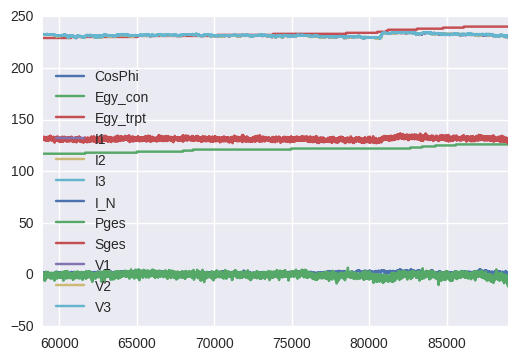

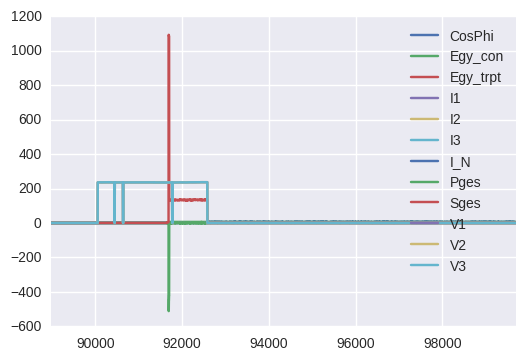

In [23]:
fig1,ax2 = plt.subplots(figsize=(6,15))
bp = df_loc.plot(kind='kde', ax2 = ax2, legend=False)
